<a href="https://colab.research.google.com/github/KelvinLam05/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project** 

This case requires to develop a customer segmentation to understand customers behavior and sepparate them in different groups or cluster according to their preferences.

**Data set information**

We are owing a supermarket mall and through membership cards , we have some basic data about our customers like Customer ID, Age, Gender, Annual Income and Spending Score. Spending Score is something we assign to the customer based on our defined parameters like customer behavior and purchasing data.

**Attribute Information**

CustomerID : Unique ID assigned to the customer

Gender : Gender of the customer

Age : Age of the customer

Annual Income (k$) : Annual Income of the customer

Spending Score : Score assigned by the mall based on customer behavior and  spending nature

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# Examine the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Exploratory Data Analysis**

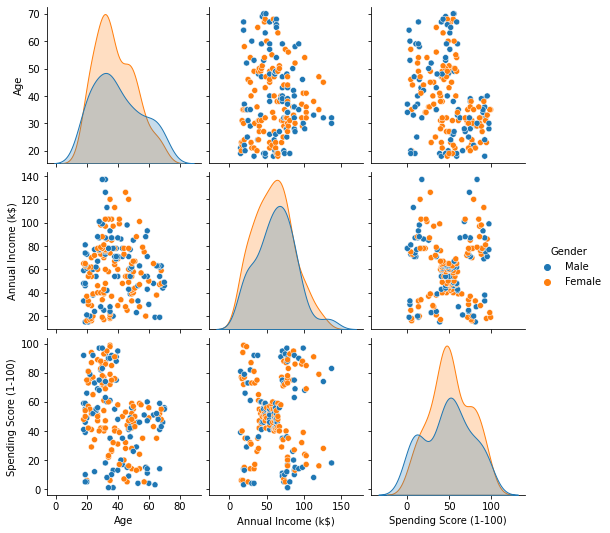

In [ ]:
# Creating a pairplot with hue defined by Gender column
sns.pairplot(df, hue = 'Gender', vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it. 

In [ ]:
# Drop Gender and CustomerID 
df.drop(['Gender', 'CustomerID'], axis = 1, inplace = True)

**Preprocessing**

In [ ]:
# Displays duplicate records
df.duplicated().sum()

0

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
dtype: int64

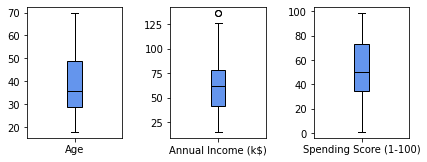

In [ ]:
# Identifying outliers 
df.plot(subplots = True, layout = (5,5), kind = 'box', figsize = (12,14), patch_artist = True, boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color= 'black'),
            )
plt.tick_params(left = False, bottom = False)
plt.subplots_adjust(wspace = 0.5);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4619b08550>,
      dtype=object)

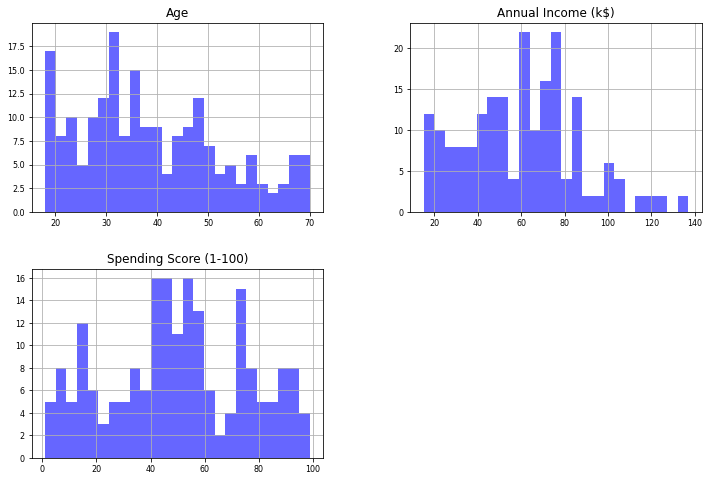

In [ ]:
# Plot
df.hist(figsize = (12, 8), bins = 25, xlabelsize = 8, ylabelsize = 8, alpha = 0.6, color = 'b')

As a general rule of thumb:

* If skewness is less than -1 or greater than 1, the distribution is highly skewed
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [ ]:
from scipy.stats import skew

In [ ]:
print('Skew in numberical features :', skew(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], bias = False))

Skew in numberical features : [ 0.48556885  0.32184255 -0.0472202 ]


The distribution of continuous features are normally distributed.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the variables with StandardScaler (returns numpy.ndarray object)
scaler = StandardScaler()
scaler.fit(df)

# Store it separately for clustering
df_transformed = scaler.transform(df)

In [ ]:
# Convert array to dataframe to plot it
pd_df_transformed = pd.DataFrame(df_transformed, columns = df.columns)

In [ ]:
# K-means works better on variables with the same variance / standard deviation.
pd_df_transformed.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


Features are now standardized and have a gaussian distribution.

**Apply KMeans clustering**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

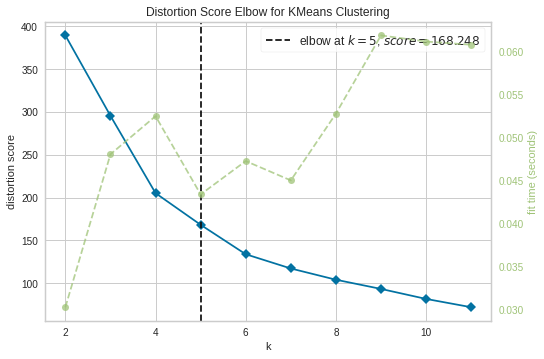

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2, 12))

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed)   

# Draw/show/poof the data
visualizer.poof()   

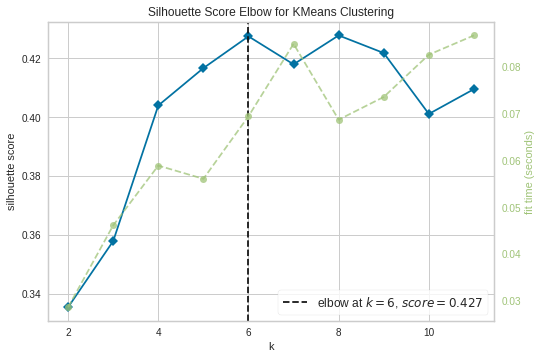

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k = (2, 12),metric = 'silhouette', timings = True)

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed)       

# Finalize and render the figure
visualizer.poof()      

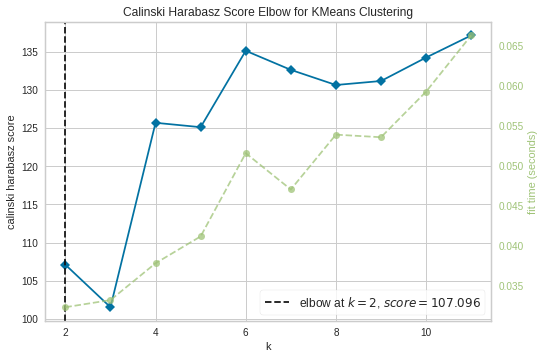

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k = (2, 12), metric = 'calinski_harabasz', timings = True)

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed)       

# Finalize and render the figure
visualizer.poof()        

The Optimal K is different for each of the three methods.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
for i in [5, 6]:
    kmeans_labels = KMeans(n_clusters = i, random_state = 42).fit_predict(pd_df_transformed)
    print('Davies Bouldin Score : ' + str(davies_bouldin_score(pd_df_transformed, kmeans_labels).round(3)))

Davies Bouldin Score : 0.875
Davies Bouldin Score : 0.828


The metric Davies Bouldin is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [ ]:
for i in range(5, 7):
    kmeans_labels = KMeans(n_clusters = i, random_state = 42).fit_predict(pd_df_transformed)
    print('Silhouette score for {} clusters k-means : {}'.format(i, silhouette_score(pd_df_transformed, kmeans_labels, metric = 'euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.417
Silhouette score for 6 clusters k-means : 0.427


Unlike Davies Bouldin, we want to be high of Silhouette score. Hence, when we evaluate both Davies Bouldin and Silhouette score, optimal cluster numbers are 6 according to K-Means Algorithm. So I have determined 6 as the optimal k value of the K-means model.

In [ ]:
km_cluster = (KMeans(n_clusters = 6 ,init = 'k-means++', n_init = 10 ,max_iter = 300, tol = 0.0001,  random_state = 42, algorithm = 'elkan'))
km_labels = km_cluster.fit_predict(pd_df_transformed)

In [ ]:
# Add KM_cluster to dataset
pd_df_transformed['KM_cluster'] = km_cluster.labels_

In [ ]:
import plotly.express as px

In [ ]:
# Plot
fig = px.scatter_3d(pd_df_transformed, x = 'Age', y = 'Spending Score (1-100)', z = 'Annual Income (k$)', color = 'KM_cluster', size_max = 18, opacity = 0.7)

# Tight layout
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
km_cluster_size = pd_df_transformed['KM_cluster']

In [ ]:
# Drop KM_cluster from dataset
pd_df_transformed.drop('KM_cluster', axis = 1, inplace = True)

In [ ]:
import copy

In [ ]:
# Make a deep copy of the dataframe
pd_df_transformed_annual_income_spending_score = pd_df_transformed.copy(deep = True)

In [ ]:
pd_df_transformed_annual_income_spending_score.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
# Drop Age from dataset
pd_df_transformed_annual_income_spending_score.drop('Age', axis = 1, inplace = True)

In [ ]:
pd_df_transformed_annual_income_spending_score.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


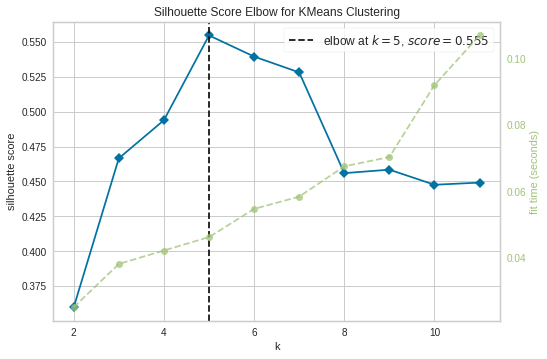

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k = (2, 12), metric = 'silhouette', timings = True)

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed_annual_income_spending_score)       

# Finalize and render the figure
visualizer.show()        

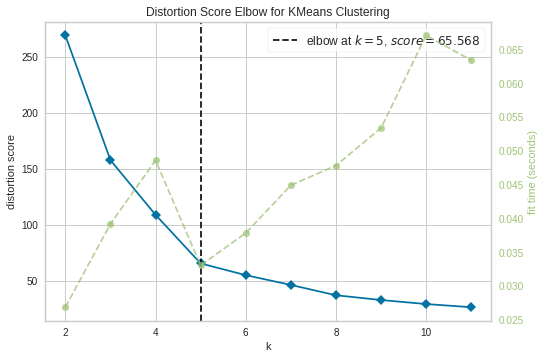

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2, 12))

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed_annual_income_spending_score)   

# Draw/show/poof the data
visualizer.poof()   

We will choose the number of clusters as 5 based on the two graphs.

In [ ]:
km_cluster = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 42, algorithm = 'elkan'))
km_cluster.fit_predict(pd_df_transformed_annual_income_spending_score)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [ ]:
# Add Cluster to dataset
pd_df_transformed_annual_income_spending_score['Cluster'] = km_cluster.labels_

In [ ]:
pd_df_transformed_annual_income_spending_score.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,3


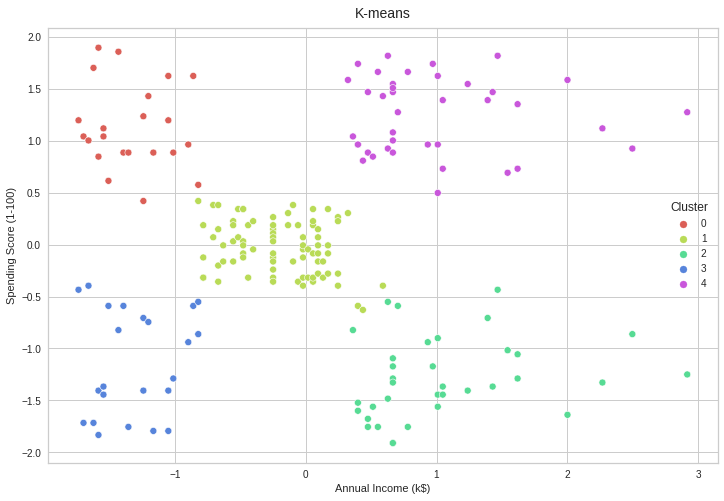

In [ ]:
# Plot K-means
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pd_df_transformed_annual_income_spending_score['Annual Income (k$)'], y =  pd_df_transformed_annual_income_spending_score['Spending Score (1-100)'], hue = pd_df_transformed_annual_income_spending_score['Cluster'], palette=sns.color_palette('hls', 5), legend = True)

plt.title('K-means', fontsize = 14, pad = 10)
plt.xlabel('Annual Income (k$)')   
plt.ylabel('Spending Score (1-100)')     
plt.show()

In [ ]:
# Make a deep copy of the dataframe
pd_df_transformed_annual_income_age = pd_df_transformed.copy(deep = True)

In [ ]:
pd_df_transformed_annual_income_age.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
# Drop Spending Score (1-100) from dataset
pd_df_transformed_annual_income_age.drop('Spending Score (1-100)', axis = 1, inplace = True)

In [ ]:
pd_df_transformed_annual_income_age.head()

,Age,Annual Income (k$)
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


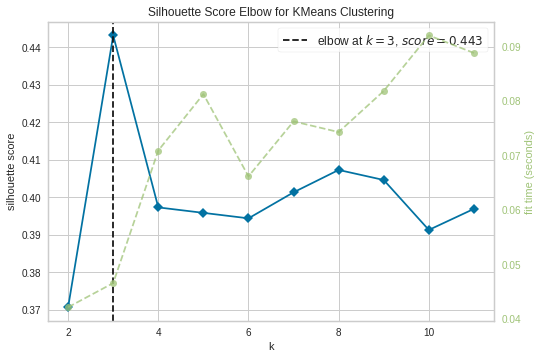

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k = (2, 12), metric = 'silhouette', timings = True)

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed_annual_income_age)       

# Finalize and render the figure
visualizer.show()        

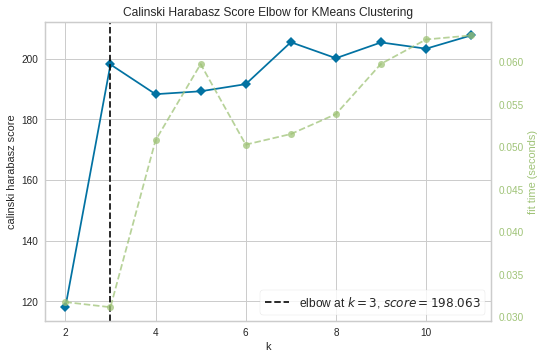

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k = (2, 12), metric = 'calinski_harabasz', timings = True)

# Fit the data to the visualizer
visualizer.fit(pd_df_transformed_annual_income_age)       

# Finalize and render the figure
visualizer.show()        

We will choose the number of clusters as 3 based on the two graphs.

In [ ]:
km_cluster= (KMeans(n_clusters = 3 ,init = 'k-means++', n_init = 10 ,max_iter = 300, tol = 0.0001,  random_state = 42, algorithm = 'elkan'))
km_cluster.fit_predict(pd_df_transformed_annual_income_age)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# Add Cluster to dataset
pd_df_transformed_annual_income_age['Cluster'] = km_cluster.labels_

In [ ]:
pd_df_transformed_annual_income_age.head()

,Age,Annual Income (k$),Cluster
0,-1.424569,-1.738999,1
1,-1.281035,-1.738999,1
2,-1.352802,-1.700830,1
3,-1.137502,-1.700830,1
4,-0.563369,-1.662660,1


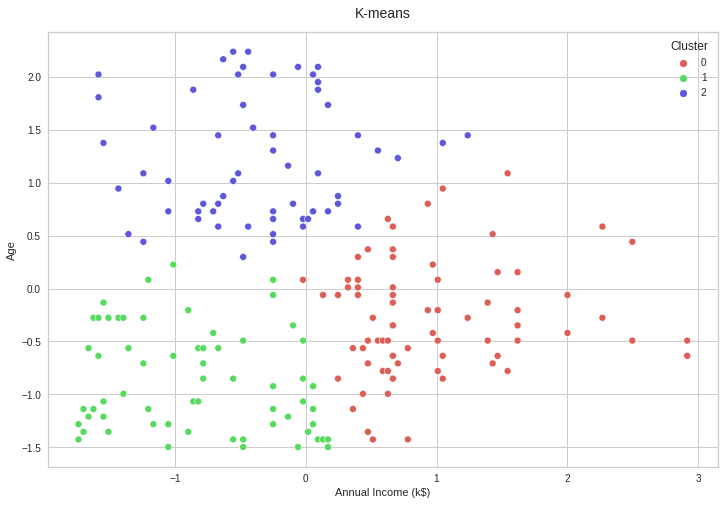

In [ ]:
# Plot K-means
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pd_df_transformed_annual_income_age['Annual Income (k$)'], y =  pd_df_transformed_annual_income_age['Age'], hue = pd_df_transformed_annual_income_age['Cluster'], palette=sns.color_palette('hls', 3), legend = True)

plt.title('K-means', fontsize = 14, pad = 14)
plt.xlabel('Annual Income (k$)')   
plt.ylabel('Age')     
plt.show()

**Apply Agglomerative clustering**

In [ ]:
import scipy.cluster.hierarchy as shc

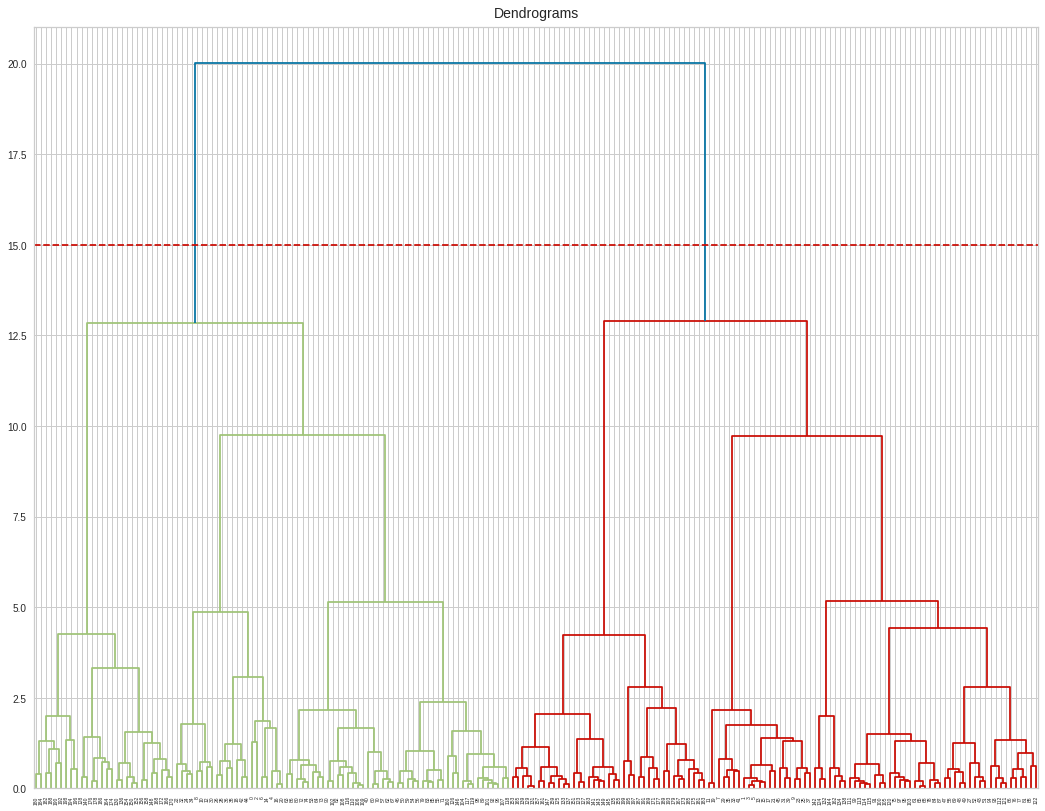

In [ ]:
# Plot Dendrograms
plt.figure(figsize = (18, 14))  
plt.title('Dendrograms', fontsize = 14, pad = 10)  
dend = shc.dendrogram(shc.linkage(pd_df_transformed, method = 'ward'))
plt.axhline(y = 15, color = 'r', linestyle = '--')

The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.


In the graph above, the best choice of no. of clusters will be 2 as the red horizontal line in the dendrogram below covers maximum vertical distance.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
hcp = hc_cluster.fit_predict(pd_df_transformed)
print('Silhouette Score for Hieararchial Clustering:'+ str(silhouette_score(pd_df_transformed, hcp, metric = 'euclidean')))
print('Davies Bouldin Score:' + str(davies_bouldin_score(pd_df_transformed, hcp)))

Silhouette Score for Hieararchial Clustering:0.31795733680759597
Davies Bouldin Score:1.3082962894168522


In [ ]:
# Add HC_cluster to dataset
pd_df_transformed['HC_cluster'] = hc_cluster.labels_

In [ ]:
# Plot
fig = px.scatter_3d(pd_df_transformed, x = 'Age', y = 'Spending Score (1-100)', z = 'Annual Income (k$)', color = 'HC_cluster', size_max = 18, opacity = 0.7)

# Tight layout
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
hc_cluster_size = pd_df_transformed['HC_cluster']

In [ ]:
# Drop HC_cluster from dataset
pd_df_transformed.drop('HC_cluster', axis = 1, inplace = True)

**Apply DBSCAN clustering**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
results = pd.DataFrame(columns=['Eps', 'Min_Samples', 'Number of Cluster', 'Silhouette Score'])
for i in range(2,12):
  for j in range(2,12):
      dbscan_cluster = DBSCAN(eps = i * 0.2, min_samples = j)
      clusters = dbscan_cluster.fit_predict(pd_df_transformed)
      if len(np.unique(clusters))>2:
          results = results.append({'Eps':i*0.2,
                        'Min_Samples': j,
                        'Number of Cluster': len(np.unique(clusters)),
                        'Silhouette Score': silhouette_score(pd_df_transformed, clusters),
                        'Davies Bouldin Score': davies_bouldin_score(pd_df_transformed, clusters)}, ignore_index = True)

In [ ]:
results.sort_values('Silhouette Score', ascending = False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
17,0.6,10.0,5.0,0.290436,1.387954
16,0.6,9.0,5.0,0.285784,1.424535
18,0.6,11.0,5.0,0.279236,1.395411
14,0.6,7.0,5.0,0.256833,2.006902
15,0.6,8.0,5.0,0.252649,1.946715


We have selected eps and min_samples that are 0.6 and 10 respectively.

In [ ]:
dbscan_cluster = DBSCAN(eps = 0.6, min_samples = 10, metric = 'euclidean', metric_params = None, algorithm = 'auto', leaf_size = 30, p = None, n_jobs = None)
db_clusters = dbscan_cluster.fit_predict(pd_df_transformed)

In [ ]:
# Add DBSCAN_cluster to dataset
pd_df_transformed['DBSCAN_cluster']= dbscan_cluster.labels_

In [ ]:
# Plot
fig = px.scatter_3d(pd_df_transformed, x = 'Age', y ='Spending Score (1-100)', z ='Annual Income (k$)', color = 'DBSCAN_cluster', size_max = 18, opacity = 0.7)

# Tight layout
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
dbscan_cluster_size = pd_df_transformed['DBSCAN_cluster']

**Conclusion**

In [ ]:
algorithms = ['K-Means', 'Hierarchical Clustering', 'DBSCAN']

# Silhouette Score
ss = [silhouette_score(pd_df_transformed, km_labels), silhouette_score(pd_df_transformed, hcp), silhouette_score(pd_df_transformed, db_clusters)]
   

# Davies Bouldin Score
db = [davies_bouldin_score(pd_df_transformed, km_labels), davies_bouldin_score(pd_df_transformed, hcp), davies_bouldin_score(pd_df_transformed, db_clusters)]

In [ ]:
# Compare algorithms
comprsn = {'Algorithms': algorithms,'Davies Bouldin': db,'Silhouette Score': ss}
compdf = pd.DataFrame(comprsn)
display(compdf.sort_values(by = ['Silhouette Score'], ascending = False))

,Algorithms,Davies Bouldin,Silhouette Score
2,DBSCAN,0.798798,0.470447
0,K-Means,0.916368,0.436349
1,Hierarchical Clustering,1.436726,0.291330


Finally, We have tried three algorithms. DBSCAN has the best Silhouette and Davies Bouldin score. For this reason, DBSCAN Algorithm is more suitable for customer segmentation. Thus we have 4 customer types. Let’s try to understand behaviours or labels of customers.

In [ ]:
clusters = pd.concat([km_cluster_size, hc_cluster_size, dbscan_cluster_size], axis = 1, sort = False)

In [ ]:
clusters.value_counts(['DBSCAN_cluster']).reset_index(name = 'Size')

,DBSCAN_cluster,Size
0,-1,66
1,1,51
2,3,34
3,2,30
4,0,19


DBSCAN created 4 clusters plus outliers cluster (-1). Sizes of clusters 0 - 3 does not vary significantly. There are 66 outliers.

In [ ]:
clusters.value_counts(['KM_cluster']).reset_index(name = 'Size')

,KM_cluster,Size
0,4,45
1,1,39
2,5,38
3,2,33
4,3,24
5,0,21


In [ ]:
clusters.value_counts(['HC_cluster']).reset_index(name = 'Size')

,HC_cluster,Size
0,0,105
1,1,95


From the above comparisons, it is clear that DBSCAN generated 4 reasonable clusters.

In [ ]:
df['Cluster'] = list(db_clusters)

In [ ]:
df.set_index('Cluster')
grouped = df.groupby(by = 'Cluster').mean().round(1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



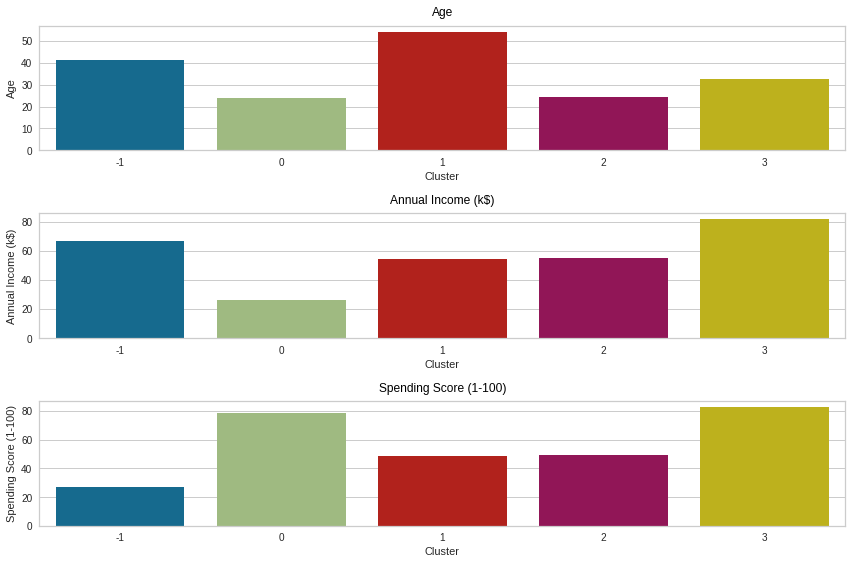

In [ ]:
# Plot
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize = (12, 8))
for i,j in enumerate(features):
    plt.subplot(3,1, i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict = {'color': 'black'}, pad = 10)
plt.tight_layout()
plt.show()

Cluster 0: Young age, low income and high spending score - Set out marketing campaigns to encourage them to spend       

Cluster 1: Senior age, medium income and medium spending score

Cluster 2: Young age, medium income and medium spending score

Cluster 3: Medium age, high income and high spending score - Set out marketing campaigns to encourage them to spend       